In [1]:
import sys
sys.path.append('..')

In [2]:
import torch
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import random
import torch.nn as nn
import torch.nn.functional as F

In [4]:
from core.getdata import *
from core.dataset import *

In [5]:
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor

In [6]:
ligands = ["TNF", "R84", "PIC", "P3K", "FLA", "CpG", "FSL", "LPS", "UST"]
polarization = ["", "ib", "ig", "i0", "i3", "i4"]
replicas, size = 2, 1288 # replicated

In [7]:
data = DatasetPolar(ligands, polarization, replicas, size)

### 60 : 20 : 20 split

In [79]:
print(len(data) * 0.6, len(data) * 0.2) # -> round this to 41730, 13911, 13911
print(len(data), 41730 + 13911 + 13911)

X_len, y_len, test_len = 41730, 13912, 13910

41731.2 13910.400000000001
69552 69552


In [80]:
dataset_X, dataset_val, dataset_test = torch.utils.data.random_split(data, [X_len, y_len, test_len])

In [115]:
#pd.DataFrame()

torch.utils.data.dataset.Subset

In [82]:
dataloader_train = torch.utils.data.DataLoader(dataset_X, batch_size=64, shuffle=True)
dataloader_val = torch.utils.data.DataLoader(dataset_val, batch_size=64, shuffle=True)
dataloader_test = torch.utils.data.DataLoader(dataset_test, batch_size=65, shuffle=True)

### Model Training

In [21]:
from core.network import *
from core.trainer import *

In [76]:
torch.cuda.is_available()
device = torch.device("cuda:0")

In [23]:
#model parameters
input_size = 1
hidden_sizes = 98
output_size = 9

#training parameters
n_epochs = 80
batch_size = 64
learning_rate = 1e-3

### 1 LSTM Layer

In [25]:
model = LSTM(input_size, hidden_sizes, output_size, num_layers=1, device="cuda:0")
model.train()

LSTM(
  (lstm): LSTM(1, 98, batch_first=True)
  (fc1): Linear(in_features=98, out_features=9, bias=True)
)

In [26]:
trainer = LSTMTrainer(model=model, device="cuda:0")

In [27]:
trainer.train(dataloader_train, dataloader_val, batch_size=batch_size, n_epochs=n_epochs)

  1%|█                                                                                  | 1/80 [00:05<07:15,  5.52s/it]

Epoch 001: | Training Loss: 2.1330842876872462 | Validation Loss: 2.1174897863230573


  2%|██                                                                                 | 2/80 [00:08<05:36,  4.32s/it]

Epoch 002: | Training Loss: 2.0798372335127264 | Validation Loss: 2.0618553489720055


  4%|███                                                                                | 3/80 [00:12<05:03,  3.94s/it]

Epoch 003: | Training Loss: 2.1275413708153765 | Validation Loss: 2.1815182736160557


  5%|████▏                                                                              | 4/80 [00:15<04:45,  3.75s/it]

Epoch 004: | Training Loss: 2.163907727640219 | Validation Loss: 2.177238941192627


  6%|█████▏                                                                             | 5/80 [00:19<04:33,  3.65s/it]

Epoch 005: | Training Loss: 2.1091924425653805 | Validation Loss: 2.060839716994434


  8%|██████▏                                                                            | 6/80 [00:22<04:27,  3.62s/it]

Epoch 006: | Training Loss: 2.032604218807191 | Validation Loss: 1.952156163683725


  9%|███████▎                                                                           | 7/80 [00:26<04:24,  3.62s/it]

Epoch 007: | Training Loss: 1.9398759360700435 | Validation Loss: 1.929908208343961


 10%|████████▎                                                                          | 8/80 [00:30<04:19,  3.61s/it]

Epoch 008: | Training Loss: 1.9211723589057397 | Validation Loss: 1.9868747504479294


 11%|█████████▎                                                                         | 9/80 [00:33<04:17,  3.63s/it]

Epoch 009: | Training Loss: 2.0077772472755466 | Validation Loss: 1.9844777091927486


 12%|██████████▎                                                                       | 10/80 [00:37<04:17,  3.68s/it]

Epoch 010: | Training Loss: 1.930306141080754 | Validation Loss: 1.8592680709077678


 14%|███████████▎                                                                      | 11/80 [00:41<04:15,  3.70s/it]

Epoch 011: | Training Loss: 1.97001252824278 | Validation Loss: 1.9571154489429718


 15%|████████████▎                                                                     | 12/80 [00:45<04:10,  3.68s/it]

Epoch 012: | Training Loss: 1.8903177907236868 | Validation Loss: 1.8290671903059024


 16%|█████████████▎                                                                    | 13/80 [00:48<04:08,  3.71s/it]

Epoch 013: | Training Loss: 1.8130165101192994 | Validation Loss: 1.7805222650186732


 18%|██████████████▎                                                                   | 14/80 [00:52<04:03,  3.69s/it]

Epoch 014: | Training Loss: 1.774926287291791 | Validation Loss: 1.7357320894888781


 19%|███████████████▍                                                                  | 15/80 [00:56<03:57,  3.66s/it]

Epoch 015: | Training Loss: 1.7411465171102725 | Validation Loss: 1.7161525389470091


 20%|████████████████▍                                                                 | 16/80 [00:59<03:53,  3.65s/it]

Epoch 016: | Training Loss: 1.7265474100755513 | Validation Loss: 1.698613121422059


 21%|█████████████████▍                                                                | 17/80 [01:03<03:49,  3.65s/it]

Epoch 017: | Training Loss: 1.7484659427523066 | Validation Loss: 1.6971618735462153


 22%|██████████████████▍                                                               | 18/80 [01:07<03:48,  3.69s/it]

Epoch 018: | Training Loss: 1.6812484875937517 | Validation Loss: 1.6415416981102129


 24%|███████████████████▍                                                              | 19/80 [01:10<03:42,  3.65s/it]

Epoch 019: | Training Loss: 1.6415053867088891 | Validation Loss: 1.612878440170113


 25%|████████████████████▌                                                             | 20/80 [01:14<03:42,  3.71s/it]

Epoch 020: | Training Loss: 1.6106929738890339 | Validation Loss: 1.5877030880079357


 26%|█████████████████████▌                                                            | 21/80 [01:18<03:41,  3.75s/it]

Epoch 021: | Training Loss: 1.6273285187039221 | Validation Loss: 1.5972420966953313


 28%|██████████████████████▌                                                           | 22/80 [01:22<03:39,  3.79s/it]

Epoch 022: | Training Loss: 1.5846977314211508 | Validation Loss: 1.5641496974393863


 29%|███████████████████████▌                                                          | 23/80 [01:25<03:35,  3.78s/it]

Epoch 023: | Training Loss: 1.5571079580926237 | Validation Loss: 1.5384039753073946


 30%|████████████████████████▌                                                         | 24/80 [01:29<03:29,  3.74s/it]

Epoch 024: | Training Loss: 1.5345517122864176 | Validation Loss: 1.5077304320597866


 31%|█████████████████████████▋                                                        | 25/80 [01:33<03:20,  3.65s/it]

Epoch 025: | Training Loss: 1.512043585684179 | Validation Loss: 1.528883362035139


 32%|██████████████████████████▋                                                       | 26/80 [01:36<03:14,  3.59s/it]

Epoch 026: | Training Loss: 1.5018024860808532 | Validation Loss: 1.508160357081562


 34%|███████████████████████████▋                                                      | 27/80 [01:39<03:08,  3.55s/it]

Epoch 027: | Training Loss: 1.4824443683142319 | Validation Loss: 1.4880664829814105


 35%|████████████████████████████▋                                                     | 28/80 [01:43<03:03,  3.53s/it]

Epoch 028: | Training Loss: 1.4695336091208056 | Validation Loss: 1.468879193887798


 36%|█████████████████████████████▋                                                    | 29/80 [01:46<02:59,  3.51s/it]

Epoch 029: | Training Loss: 1.45335173734662 | Validation Loss: 1.451289492462753


 38%|██████████████████████████████▊                                                   | 30/80 [01:50<02:56,  3.53s/it]

Epoch 030: | Training Loss: 1.4424918291214597 | Validation Loss: 1.4398458594575934


 39%|███████████████████████████████▊                                                  | 31/80 [01:54<02:53,  3.55s/it]

Epoch 031: | Training Loss: 1.4183932111055162 | Validation Loss: 1.4523486577042746


 40%|████████████████████████████████▊                                                 | 32/80 [01:57<02:49,  3.53s/it]

Epoch 032: | Training Loss: 1.4063183228053142 | Validation Loss: 1.436389642024259


 41%|█████████████████████████████████▊                                                | 33/80 [02:01<02:46,  3.53s/it]

Epoch 033: | Training Loss: 1.3942753914486943 | Validation Loss: 1.3977963350234774


 42%|██████████████████████████████████▊                                               | 34/80 [02:04<02:43,  3.55s/it]

Epoch 034: | Training Loss: 1.3797038412933875 | Validation Loss: 1.391250023601252


 44%|███████████████████████████████████▉                                              | 35/80 [02:08<02:40,  3.57s/it]

Epoch 035: | Training Loss: 1.3713257110137123 | Validation Loss: 1.394821224409506


 45%|████████████████████████████████████▉                                             | 36/80 [02:11<02:37,  3.57s/it]

Epoch 036: | Training Loss: 1.3646831749774413 | Validation Loss: 1.3962786648798426


 46%|█████████████████████████████████████▉                                            | 37/80 [02:15<02:33,  3.57s/it]

Epoch 037: | Training Loss: 1.4003448471723619 | Validation Loss: 1.3783625965818354


 48%|██████████████████████████████████████▉                                           | 38/80 [02:19<02:29,  3.56s/it]

Epoch 038: | Training Loss: 1.3408201155217099 | Validation Loss: 1.3539255234079624


 49%|███████████████████████████████████████▉                                          | 39/80 [02:22<02:26,  3.56s/it]

Epoch 039: | Training Loss: 1.3308245525973497 | Validation Loss: 1.3811260992233907


 50%|█████████████████████████████████████████                                         | 40/80 [02:26<02:22,  3.57s/it]

Epoch 040: | Training Loss: 1.314209564447768 | Validation Loss: 1.3455044474076787


 51%|██████████████████████████████████████████                                        | 41/80 [02:29<02:19,  3.58s/it]

Epoch 041: | Training Loss: 1.303029575629037 | Validation Loss: 1.332891113167509


 52%|███████████████████████████████████████████                                       | 42/80 [02:33<02:15,  3.57s/it]

Epoch 042: | Training Loss: 1.3023142585528025 | Validation Loss: 1.3979647577902592


 54%|████████████████████████████████████████████                                      | 43/80 [02:36<02:11,  3.55s/it]

Epoch 043: | Training Loss: 1.3052123336843109 | Validation Loss: 1.3177380876256786


 55%|█████████████████████████████████████████████                                     | 44/80 [02:40<02:06,  3.53s/it]

Epoch 044: | Training Loss: 1.2813721109312854 | Validation Loss: 1.3170674541674623


 56%|██████████████████████████████████████████████▏                                   | 45/80 [02:43<02:03,  3.52s/it]

Epoch 045: | Training Loss: 1.2717193075745248 | Validation Loss: 1.3081622345185062


 57%|███████████████████████████████████████████████▏                                  | 46/80 [02:47<01:59,  3.52s/it]

Epoch 046: | Training Loss: 1.2753673706996678 | Validation Loss: 1.31669940943018


 59%|████████████████████████████████████████████████▏                                 | 47/80 [02:50<01:55,  3.51s/it]

Epoch 047: | Training Loss: 1.2510813959342233 | Validation Loss: 1.295527031935683


 60%|█████████████████████████████████████████████████▏                                | 48/80 [02:54<01:52,  3.51s/it]

Epoch 048: | Training Loss: 1.2953951756767985 | Validation Loss: 1.350325634173297


 61%|██████████████████████████████████████████████████▏                               | 49/80 [02:57<01:48,  3.49s/it]

Epoch 049: | Training Loss: 1.2773783100144238 | Validation Loss: 1.296413266330684


 62%|███████████████████████████████████████████████████▎                              | 50/80 [03:01<01:45,  3.52s/it]

Epoch 050: | Training Loss: 1.237026146049704 | Validation Loss: 1.2826328302195313


 64%|████████████████████████████████████████████████████▎                             | 51/80 [03:04<01:41,  3.51s/it]

Epoch 051: | Training Loss: 1.2257392437726395 | Validation Loss: 1.3002146466062703


 65%|█████████████████████████████████████████████████████▎                            | 52/80 [03:08<01:38,  3.51s/it]

Epoch 052: | Training Loss: 1.2286135019423585 | Validation Loss: 1.2802105053849178


 66%|██████████████████████████████████████████████████████▎                           | 53/80 [03:11<01:34,  3.50s/it]

Epoch 053: | Training Loss: 1.2167823085558542 | Validation Loss: 1.2727487002490858


 68%|███████████████████████████████████████████████████████▎                          | 54/80 [03:15<01:31,  3.51s/it]

Epoch 054: | Training Loss: 1.2172332075617032 | Validation Loss: 1.2742885288295396


 69%|████████████████████████████████████████████████████████▍                         | 55/80 [03:18<01:27,  3.52s/it]

Epoch 055: | Training Loss: 1.2006844742192244 | Validation Loss: 1.2615069432542958


 70%|█████████████████████████████████████████████████████████▍                        | 56/80 [03:22<01:24,  3.52s/it]

Epoch 056: | Training Loss: 1.1947467292432215 | Validation Loss: 1.257525422977745


 71%|██████████████████████████████████████████████████████████▍                       | 57/80 [03:25<01:20,  3.51s/it]

Epoch 057: | Training Loss: 1.215185727404964 | Validation Loss: 1.300600691399443


 72%|███████████████████████████████████████████████████████████▍                      | 58/80 [03:29<01:17,  3.50s/it]

Epoch 058: | Training Loss: 1.1899707386723704 | Validation Loss: 1.2528097648686225


 74%|████████████████████████████████████████████████████████████▍                     | 59/80 [03:32<01:13,  3.50s/it]

Epoch 059: | Training Loss: 1.1670731169158794 | Validation Loss: 1.237255223027063


 75%|█████████████████████████████████████████████████████████████▌                    | 60/80 [03:36<01:09,  3.50s/it]

Epoch 060: | Training Loss: 1.1614494494420646 | Validation Loss: 1.300346271980793


 76%|██████████████████████████████████████████████████████████████▌                   | 61/80 [03:39<01:06,  3.51s/it]

Epoch 061: | Training Loss: 1.1652971414840605 | Validation Loss: 1.2421946689623211


 78%|███████████████████████████████████████████████████████████████▌                  | 62/80 [03:43<01:03,  3.51s/it]

Epoch 062: | Training Loss: 1.2142454012429733 | Validation Loss: 1.2978822821324025


 79%|████████████████████████████████████████████████████████████████▌                 | 63/80 [03:46<00:59,  3.51s/it]

Epoch 063: | Training Loss: 1.170659580785684 | Validation Loss: 1.2436674603628457


 80%|█████████████████████████████████████████████████████████████████▌                | 64/80 [03:50<00:56,  3.51s/it]

Epoch 064: | Training Loss: 1.1489586730645955 | Validation Loss: 1.2451116866474852


 81%|██████████████████████████████████████████████████████████████████▋               | 65/80 [03:53<00:52,  3.51s/it]

Epoch 065: | Training Loss: 1.135068294465268 | Validation Loss: 1.2355996610921458


 82%|███████████████████████████████████████████████████████████████████▋              | 66/80 [03:57<00:49,  3.51s/it]

Epoch 066: | Training Loss: 1.1248577554777242 | Validation Loss: 1.2435481069831673


 84%|████████████████████████████████████████████████████████████████████▋             | 67/80 [04:00<00:45,  3.50s/it]

Epoch 067: | Training Loss: 1.1351387403095299 | Validation Loss: 1.2761016058812447


 85%|█████████████████████████████████████████████████████████████████████▋            | 68/80 [04:04<00:42,  3.51s/it]

Epoch 068: | Training Loss: 1.1105147124614687 | Validation Loss: 1.2263787826266856


 86%|██████████████████████████████████████████████████████████████████████▋           | 69/80 [04:08<00:38,  3.52s/it]

Epoch 069: | Training Loss: 1.1553082451520982 | Validation Loss: 1.2728978761839211


 88%|███████████████████████████████████████████████████████████████████████▊          | 70/80 [04:11<00:35,  3.52s/it]

Epoch 070: | Training Loss: 1.1264694451738098 | Validation Loss: 1.2163395865247884


 89%|████████████████████████████████████████████████████████████████████████▊         | 71/80 [04:15<00:31,  3.51s/it]

Epoch 071: | Training Loss: 1.0990854853145196 | Validation Loss: 1.2212422069059599


 90%|█████████████████████████████████████████████████████████████████████████▊        | 72/80 [04:18<00:28,  3.51s/it]

Epoch 072: | Training Loss: 1.1098582342974441 | Validation Loss: 1.2107228267630306


 91%|██████████████████████████████████████████████████████████████████████████▊       | 73/80 [04:22<00:24,  3.51s/it]

Epoch 073: | Training Loss: 1.0820347724245665 | Validation Loss: 1.2471039317069796


 92%|███████████████████████████████████████████████████████████████████████████▊      | 74/80 [04:25<00:21,  3.50s/it]

Epoch 074: | Training Loss: 1.118932596551879 | Validation Loss: 1.2245937976815284


 94%|████████████████████████████████████████████████████████████████████████████▉     | 75/80 [04:29<00:17,  3.51s/it]

Epoch 075: | Training Loss: 1.0623058208462655 | Validation Loss: 1.2146967250272769


 95%|█████████████████████████████████████████████████████████████████████████████▉    | 76/80 [04:32<00:14,  3.51s/it]

Epoch 076: | Training Loss: 1.0655358206440808 | Validation Loss: 1.2045128391970188


 96%|██████████████████████████████████████████████████████████████████████████████▉   | 77/80 [04:36<00:10,  3.50s/it]

Epoch 077: | Training Loss: 1.06305414771413 | Validation Loss: 1.206229655841075


 98%|███████████████████████████████████████████████████████████████████████████████▉  | 78/80 [04:39<00:07,  3.53s/it]

Epoch 078: | Training Loss: 1.0612863794790657 | Validation Loss: 1.2295559877102529


 99%|████████████████████████████████████████████████████████████████████████████████▉ | 79/80 [04:43<00:03,  3.56s/it]

Epoch 079: | Training Loss: 1.0468281581427383 | Validation Loss: 1.2011889995784935


100%|██████████████████████████████████████████████████████████████████████████████████| 80/80 [04:46<00:00,  3.59s/it]

Epoch 080: | Training Loss: 1.0377301262494798 | Validation Loss: 1.1946802497456928


### Saving the Model

In [52]:
dir_save = '../models/'
trainer.save(dir_save + 'manuscriptmodel.pth')

### Validation Eval

In [77]:
torch.cuda.empty_cache()
x_batch, y_batch = dataset_val[:]
x_batch = torch.tensor(x_batch, device=torch.device("cuda:0"))
y_pred = trainer.network(x_batch)
y_pred = F.softmax(y_pred, dim=1)
y_pred = y_pred.detach().cpu().numpy()
y_pred = np.argmax(y_pred, axis=1)
dic = {"y_pred": y_pred, "y_true": y_batch}

val_df = pd.DataFrame(dic)

In [42]:
print(val_df)

       y_pred  y_true
0           8       8
1           6       4
2           1       2
3           2       0
4           1       1
...       ...     ...
13906       6       3
13907       3       3
13908       7       6
13909       2       6
13910       0       0

[13911 rows x 2 columns]


In [44]:
print(f' Accuracy: {sum(val_df["y_pred"] == val_df["y_true"])/13911}')

 Accuracy: 0.5732154410178995


### Test Eval

In [46]:
torch.cuda.empty_cache()
x_batch, y_batch = dataset_test[:]
x_batch = torch.tensor(x_batch, device=torch.device("cuda:0"))
y_pred = trainer.network(x_batch)
y_pred = F.softmax(y_pred, dim=1)
y_pred = y_pred.detach().cpu().numpy()
y_pred = np.argmax(y_pred, axis=1)
dic = {"y_pred": y_pred, "y_true": y_batch}

test_df = pd.DataFrame(dic)

In [47]:
print(test_df)

       y_pred  y_true
0           1       1
1           1       1
2           2       7
3           4       0
4           1       1
...       ...     ...
13906       7       7
13907       2       5
13908       0       4
13909       0       0
13910       8       8

[13911 rows x 2 columns]


In [48]:
print(f' Accuracy: {sum(test_df["y_pred"] == test_df["y_true"])/13911}')

 Accuracy: 0.569333620875566


In [108]:
one_true, one_pred, one_prob = np.empty([64,]).T, np.empty([64,]).T, np.empty([65,9])

In [109]:
for x, y in dataloader_test:
    x, y = x.to(device), y.to(device)
    y_true = y.detach().cpu().numpy()
    one_true = np.hstack([one_true, y_true.T])
    y_pred = trainer.network(x)
    y_pred = F.softmax(y_pred, dim=1)
    y_pred = y_pred.detach().cpu().numpy()
    one_prob = np.vstack([one_prob, y_pred])
    y_pred = np.argmax(y_pred, axis=1)
    one_pred = np.hstack([one_pred, y_pred.T])

### Plots and Metrics

In [94]:
import sklearn.metrics
from core.visualization import *

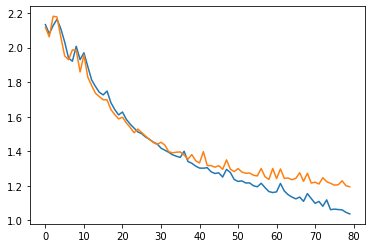

In [95]:
plt.plot(trainer.loss_history[0])
plt.plot(trainer.loss_history[1])

In [96]:
report = sklearn.metrics.classification_report(test_df["y_true"], test_df["y_pred"], target_names=ligands, output_dict=True)
rep = pd.DataFrame(report).transpose()

In [97]:
print(rep)

              precision    recall  f1-score       support
TNF            0.593886  0.604061  0.598930   1576.000000
R84            0.628776  0.786675  0.698919   1561.000000
PIC            0.638012  0.598614  0.617685   1587.000000
P3K            0.544029  0.583819  0.563222   1545.000000
FLA            0.474131  0.387137  0.426241   1586.000000
CpG            0.436530  0.407773  0.421662   1518.000000
FSL            0.358586  0.284379  0.317200   1498.000000
LPS            0.430540  0.480461  0.454133   1561.000000
UST            0.945048  1.000000  0.971748   1479.000000
accuracy       0.569334  0.569334  0.569334      0.569334
macro avg      0.561060  0.570324  0.563304  13911.000000
weighted avg   0.560141  0.569334  0.562343  13911.000000


In [98]:
f1_df = rep[:9]["f1-score"]

<AxesSubplot:>

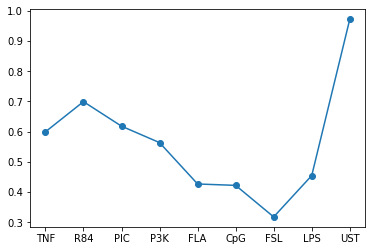

In [99]:
f1_df.plot(y = 'f1-score', style = 'o-')

In [100]:
confusion = sklearn.metrics.confusion_matrix(test_df["y_true"], test_df["y_pred"])
confusion = sklearn.metrics.ConfusionMatrixDisplay(confusion)

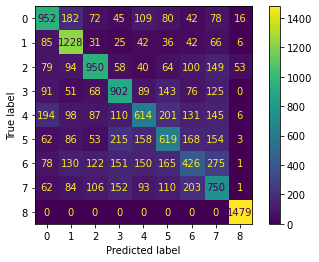

In [101]:
confusion.plot()

In [111]:
one_prob, one_true, one_pred = one_prob[65:], one_true[64:], one_pred[64:]
one_fraction = Fraction(one_true, one_prob)

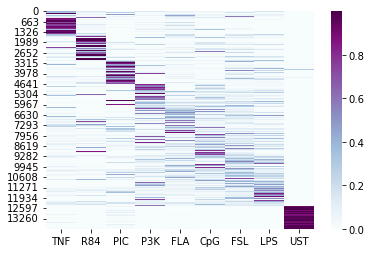

In [114]:
ocf = sns.heatmap(one_fraction, cmap="BuPu", xticklabels=ligands)

### Polarized States

In [70]:
unpolarized_data = DatasetPolar(ligands, [""], replicas, size)
ib = DatasetPolar(ligands, ["ib"], replicas, size)
ig = DatasetPolar(ligands, ["ig"], replicas, size)
i0 = DatasetPolar(ligands, ["i0"], replicas, size)
i3 = DatasetPolar(ligands, ["i3"], replicas, size)
i4 = DatasetPolar(ligands, ["i4"], replicas, size)

In [71]:
_, unpolarizedtest = torch.utils.data.random_split(unpolarized_data, [11592 - 3200, 3200])
_, ibtest = torch.utils.data.random_split(unpolarized_data, [11592 - 3200, 3200])
_, igtest = torch.utils.data.random_split(unpolarized_data, [11592 - 3200, 3200])
_, i0test = torch.utils.data.random_split(unpolarized_data, [11592 - 3200, 3200])
_, i3test = torch.utils.data.random_split(unpolarized_data, [11592 - 3200, 3200])
_, i4test = torch.utils.data.random_split(unpolarized_data, [11592 - 3200, 3200])

uploader = torch.utils.data.DataLoader(unpolarizedtest, batch_size=32, shuffle=True)
ibloader = torch.utils.data.DataLoader(ibtest, batch_size=32, shuffle=True)
igloader = torch.utils.data.DataLoader(igtest, batch_size=32, shuffle=True)
i0loader = torch.utils.data.DataLoader(i0test, batch_size=32, shuffle=True)
i3loader = torch.utils.data.DataLoader(i3test, batch_size=32, shuffle=True)
i4loader = torch.utils.data.DataLoader(i4test, batch_size=32, shuffle=True)

69552
11592
